# Multiple linear regression model

**Multiple linear regression** is used to estimate the relationship between **two or more independent variables** and **one dependent variable**

The below equation demonstrates the multiple linear regression.

$Y = β_0 + β_1𝑋_1 + β_2𝑋_2 + β_p𝑋_p + ϵ$ 

The residual sum of error would be calculated like this:
$ RSS  = Σ_{i=1}^{n}(y_i - \hat{y_i})^2 = Σ_{i=1}^{n}(y_i - (\hat{β_0}+\hat{β_1}x_1+\hat{β_2}x_2+ ... +\hat{β_p}x_p))^2 $

All results of Simple Linear Regression can be extended to the Multiple one.
To solve $\hat{β}$, set two matrices A and b.
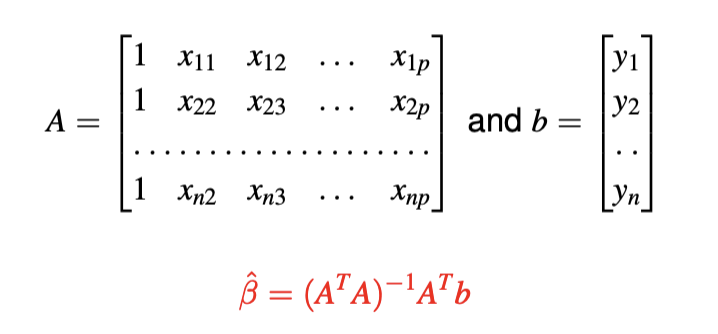

# Building a multiple linear regression model

### 1. Importing tools

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model, metrics, feature_extraction
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

### 2. Reading the datafile

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('drive/MyDrive/kc_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


The x values will be `"bedrooms"`, `"yr_built"`, `"sqft_living"`, `"sqft_lot"`, `"floors"`
<br>The y value will be the price.

In [57]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [68]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split

features = df[['bedrooms', 'view', 'sqft_living', 'condition']]
y = df[['price']]

x_train, x_test, y_train, y_test = train_test_split(features, y, train_size=0.8, test_size=0.2)

### 3. Creating an abstract model and fitting data

In [69]:
multi_model = linear_model.LinearRegression()
multi_model.fit(x_train, y_train) 

LinearRegression()

In [70]:
y_predict = multi_model.predict(x_test)

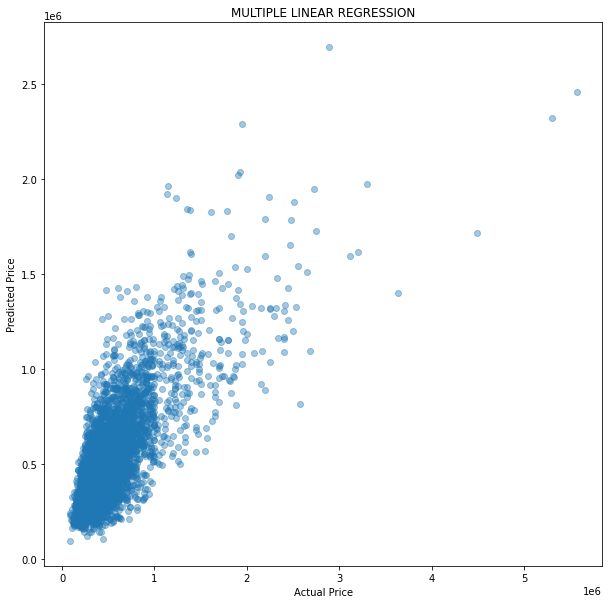

In [73]:
#Visualization
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_predict, alpha=0.4)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("MULTIPLE LINEAR REGRESSION")
plt.show()

### 4. Analysis

In [74]:
print(multi_model.coef_)
print(multi_model.intercept_)
print(multi_model.score(x_train, y_train)) # R^2

[[-48433.56608831  96979.76080034    286.73997765  42902.44893859]]
[-63096.8658191]
0.5493594971300844


### What variables should we choose in order to make the best prediction?
<br> Let's compare the scatterplot between a single independent variable and a single dependent variable.

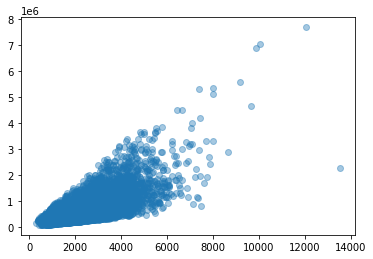

In [55]:
plt.scatter(df[['sqft_living']], df[['price']], alpha=0.4)
plt.show()

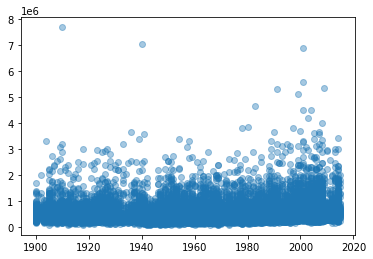

In [54]:
plt.scatter(df[['yr_built']], df[['price']], alpha=0.4)
plt.show()

We can observe that `'sqft_living'` is a better estimator compared than `'yr_built'`

# Building a multiple linear regression model including categorical data

Let's use  `bedrooms`, `bathrooms`, `sqft_living`, `sqft_lot`, `floors`, `zipcode` to estimate the price of houses

First, divide the features into categorical and numerical data

In [ ]:
features_numerical = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors']
feature_categorical = ['zipcode']

In [ ]:
category_expand = pd.get_dummies(df[feature_categorical], columns=feature_categorical)
category_expand

,zipcode_98001,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21609,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
21610,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21611,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_encoded = pd.concat([df[['price','id']], df[features_numerical]], axis = 1)

In [ ]:
df_encoded = pd.concat([df_encoded, category_expand], axis=1)
df_encoded

,price,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,zipcode_98001,zipcode_98002,zipcode_98003,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,221900.0,7129300520,3,1.00,1180,5650,1.0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,538000.0,6414100192,3,2.25,2570,7242,2.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,180000.0,5631500400,2,1.00,770,10000,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,604000.0,2487200875,4,3.00,1960,5000,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,510000.0,1954400510,3,2.00,1680,8080,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,263000018,3,2.50,1530,1131,3.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21609,400000.0,6600060120,4,2.50,2310,5813,2.0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
21610,402101.0,1523300141,2,0.75,1020,1350,2.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21611,400000.0,291310100,3,2.50,1600,2388,2.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Now, let's split our data into test data and train data

In [ ]:
msk = np.random.rand(len(df)) < 0.8


df_encoded_train = df_encoded[msk]
df_encoded_test = df_encoded[~msk]

# 1. Build an abstract model

In [ ]:
multi_categorical_model = linear_model.LinearRegression()

# 2. convert `pandas.series` into `numpy array`

In [ ]:
X_encoded_train = df_encoded_train.drop(['price','id'],axis=1).values
Y_encoded_train = df_encoded_train['price'].values

X_encoded_train.shape

(17332, 75)

# 3. Fitting the data into the model


In [ ]:
multi_categorical_model.fit(X_encoded_train, Y_encoded_train)

LinearRegression()

In [76]:
# Based on the training data
Y_encoded_fit = multi_categorical_model.predict(X_encoded_train)

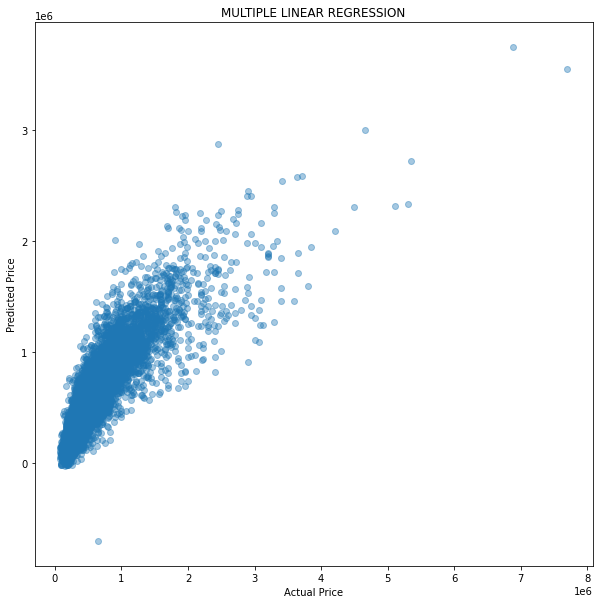

In [77]:
# Visualization
plt.figure(figsize=(10,10))
plt.scatter(Y_encoded_train, Y_encoded_fit, alpha=0.4)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("MULTIPLE LINEAR REGRESSION")
plt.show()

In [78]:
## Analysis 

# Let's see how well the model fits the training data
print("Mean squared error: %.2f"
      % metrics.mean_squared_error(Y_encoded_train, Y_encoded_fit))

print("square root of mean squared error: $%.2f"
      % np.sqrt(metrics.mean_squared_error(Y_encoded_train, Y_encoded_fit)))

# Explained R2 score: 1 is perfect prediction
print('R2 score: %.2f' % metrics.r2_score(Y_encoded_train, Y_encoded_fit))

Mean squared error: 34847885406.79
square root of mean squared error: $186675.88
R2 score: 0.74
